In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
print(os.getcwd())


/global/u1/e/edown/code/jupyter


In [3]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS*

/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_0_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_10_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_11_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_12_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_13_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_14_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_15_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_16_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_17_clustering.ran.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_1_clustering.r

Calculating fsky with randoms

In [4]:
with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_ANY_N_nz.txt') as file:
    print('N')
    print(file.read())
    
with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_ANY_S_nz.txt') as file:
    print('S')
    print(file.read())

N
#area is 86.4016square degrees
#zmid zlow zhigh n(z) Nbin Vol_bin
0.02 0.01 0.03 0.13649996402175835 820.6421373416524 6012.031894827756
0.04 0.03 0.05 0.09069746026450222 2018.5819629146413 22256.212654994128
0.06 0.05 0.06999999999999999 0.055916735351405504 2715.803639399908 48568.70885491788
0.07999999999999999 0.06999999999999999 0.09 0.05392516584221614 4546.996651039282 84320.49452279285
0.1 0.09 0.11 0.025187609773069747 3246.4887663490745 128892.29250407779
0.12 0.11 0.13 0.025432904044522916 4620.562625070539 181676.56422490207
0.14 0.13 0.15000000000000002 0.031175942572322382 7547.049612049959 242079.27617720648
0.16000000000000003 0.15000000000000002 0.17 0.015988428550106914 4948.76269320228 309521.51912197703
0.18 0.17 0.19 0.017861571797760857 6848.856385006307 383440.8563005013
0.2 0.19 0.21000000000000002 0.016257998612180084 7532.209141630739 463292.51965785
0.22000000000000003 0.21000000000000002 0.23 0.014175378619991408 7775.910940190783 548550.4936866015
0.24 0

In [5]:
A = 86.4016 + 87.3556
print(A)

173.7572


In [6]:
N0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_0_clustering.ran.fits')
S0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_0_clustering.ran.fits')

In [7]:
N0.dtype.names

('TARGETID',
 'RA',
 'DEC',
 'NTILE',
 'TILES',
 'rosette_number',
 'rosette_r',
 'COMP_TILE',
 'Z',
 'WEIGHT',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_R',
 'NZ',
 'WEIGHT_FKP')

In [8]:
filelist_N = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_*_clustering.ran.fits')
filelist_S = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_*_clustering.ran.fits')

filelist = filelist_N + filelist_S
print(np.shape(filelist))

(36,)


In [9]:
"""randoms = Table(names=(np.array(N0.dtype.names)), dtype=N0.dtype)

for f in filelist:
    print(f)
    randoms = np.hstack((randoms,Table.read(f)))
    
randoms = Table(randoms)"""

'randoms = Table(names=(np.array(N0.dtype.names)), dtype=N0.dtype)\n\nfor f in filelist:\n    print(f)\n    randoms = np.hstack((randoms,Table.read(f)))\n    \nrandoms = Table(randoms)'

In [10]:
#print(np.shape(randoms)[0])
print(np.shape(N0)[0] + np.shape(S0)[0])

434393


In [11]:
sky_area = 4*np.pi*np.rad2deg(1)**2
print(sky_area)

41252.96124941928


In [12]:
survey_area = 434393 / 2500 #randoms / deg^2
print(survey_area) # in deg^2
fsky = survey_area/sky_area
print(fsky)

A = 86.4016 + 87.3556
print(A)

fsky_hdr = A/sky_area
print(fsky_hdr)



173.7572
0.004211993387564293
173.7572
0.004211993387564293


Reading data

In [13]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_clustering.dat.fits')

N_bright = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
S_bright = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')

In [14]:
N

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.4318181818181818,3.0,1.5743490921284766,0.3333333333333333,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361,0.0076878089647186044,0.0189012692383565
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.4318181818181818,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267,0.0076878089647186044,0.0189012692383565
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.4318181818181818,3.0,1.7267282368438097,0.2,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654,0.017861571797760857,0.008223843310435642
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.4318181818181818,3.0,1.7154596184117625,0.3333333333333333,601583918157758562 .. -8934769733576671188,0.265625,1.0,3.6857142857142855,9.799708,23.07847,40.24855,43.608025,32.920425,0.5506603859408487,-0.027984211522950803,0.35134044892291943,0.17986420125298275,0.5984338493516907,0.5114153982880107,-0.276855613881954,-0.276855613881954,-20.65269989753773,0.0076878089647186044,0.0189012692383565
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.4318181818181818,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835,0.0025093016341671114,0.055734255355941044
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.4318181818181818,3.0,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533,0.014175378619991408,0.010340274472459292
188.7327720032468,60.217374759371836,39633390164510283,1,100,0.23282508447174644,0.4318181818181818,3.0,1.680631967400249,0.25,-1 .. -1,1.0,1.0,1.0,14.161283,45.448513,84.034935,83.2855,57.59129,0.8939001425702994,0.06443304616627457,0.43657561294656116,0.29160589516251845,0.8087714571397985,0.7488771473733059,-0.22584033193759404,-0.22584033193759404,-21.029216752429768,0.013312673657954965,0.011002985286624948
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.4318181818181818,3.0,1.6990866107210438,0.3333333333333333,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.63004749059852

In [15]:
S.dtype.names

('RA',
 'DEC',
 'TARGETID',
 'NTILE',
 'TILES',
 'Z',
 'COMP_TILE',
 'rosette_number',
 'rosette_r',
 'FRACZ_TILELOCID',
 'BITWEIGHTS',
 'PROB_OBS',
 'WEIGHT_ZFAIL',
 'WEIGHT',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_R',
 'NZ',
 'WEIGHT_FKP')

In [16]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined

In [17]:
data

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.4318181818181818,3.0,1.5743490921284766,0.3333333333333333,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361,0.0076878089647186044,0.0189012692383565
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.4318181818181818,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267,0.0076878089647186044,0.0189012692383565
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.4318181818181818,3.0,1.7267282368438097,0.2,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654,0.017861571797760857,0.008223843310435642
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.4318181818181818,3.0,1.7154596184117625,0.3333333333333333,601583918157758562 .. -8934769733576671188,0.265625,1.0,3.6857142857142855,9.799708,23.07847,40.24855,43.608025,32.920425,0.5506603859408487,-0.027984211522950803,0.35134044892291943,0.17986420125298275,0.5984338493516907,0.5114153982880107,-0.276855613881954,-0.276855613881954,-20.65269989753773,0.0076878089647186044,0.0189012692383565
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.4318181818181818,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835,0.0025093016341671114,0.055734255355941044
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.4318181818181818,3.0,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533,0.014175378619991408,0.010340274472459292
188.7327720032468,60.217374759371836,39633390164510283,1,100,0.23282508447174644,0.4318181818181818,3.0,1.680631967400249,0.25,-1 .. -1,1.0,1.0,1.0,14.161283,45.448513,84.034935,83.2855,57.59129,0.8939001425702994,0.06443304616627457,0.43657561294656116,0.29160589516251845,0.8087714571397985,0.7488771473733059,-0.22584033193759404,-0.22584033193759404,-21.029216752429768,0.013312673657954965,0.011002985286624948
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.4318181818181818,3.0,1.6990866107210438,0.3333333333333333,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.63004749059852

Plot - absmag histogram

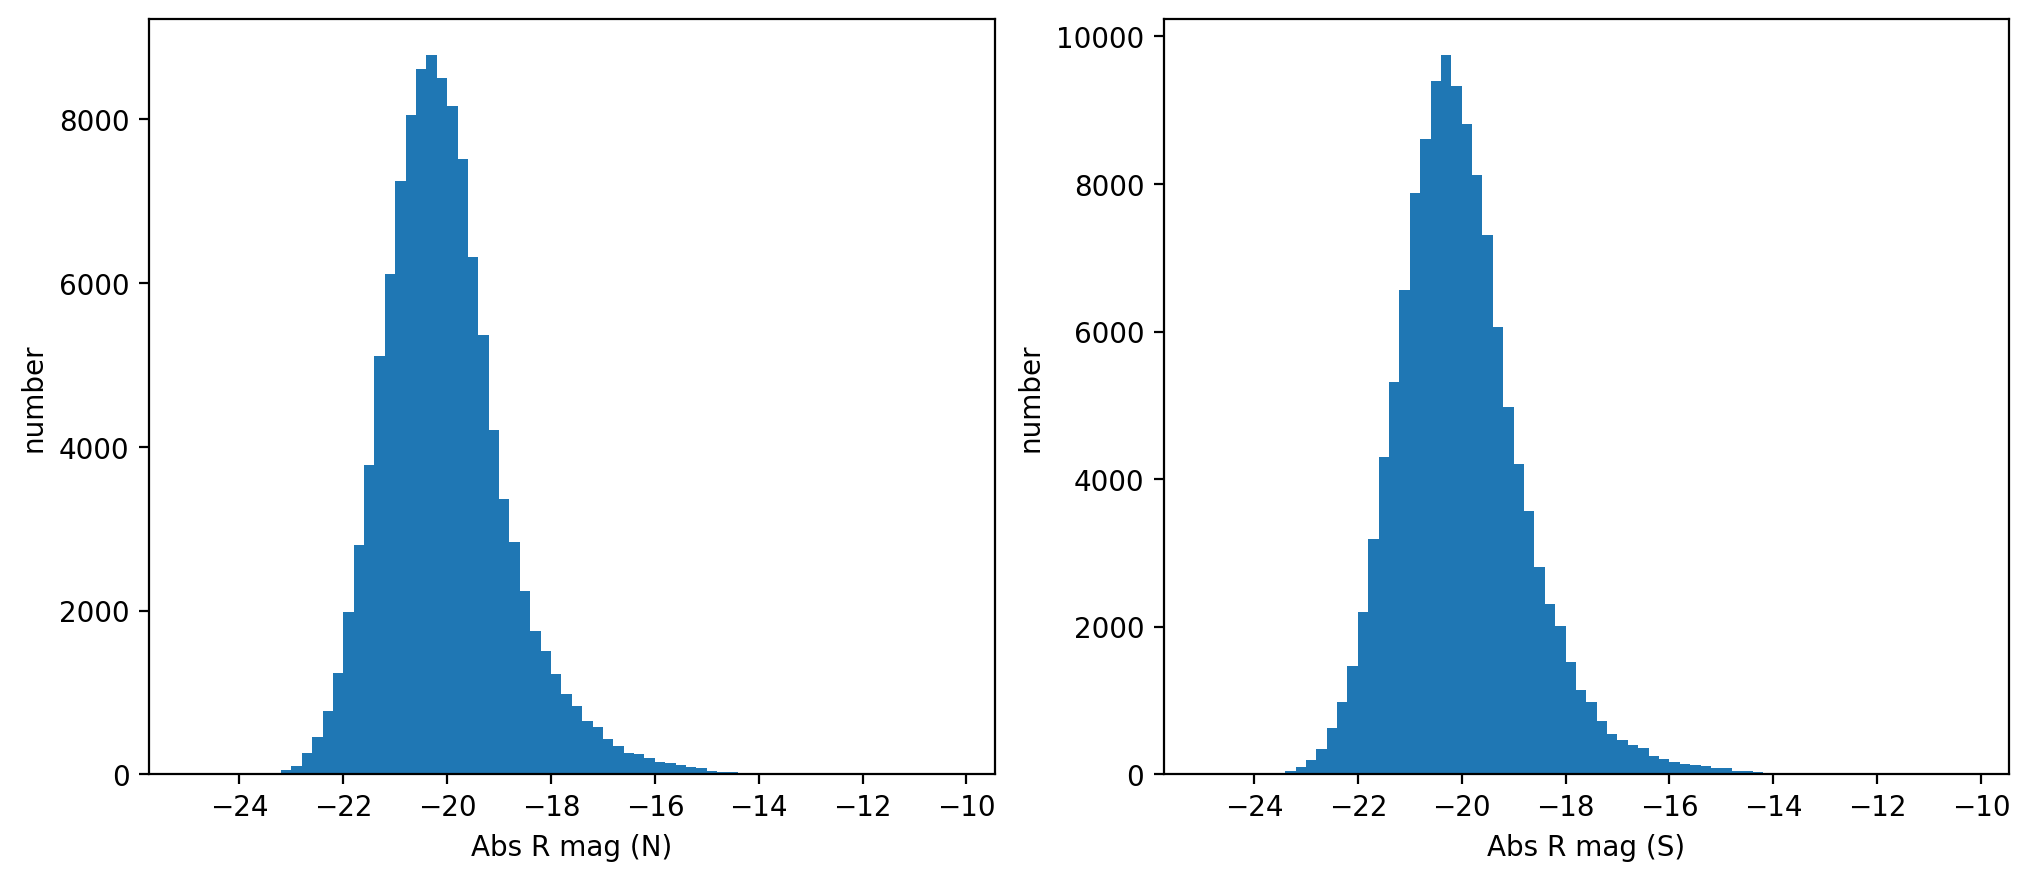

In [18]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-25,-10,0.2)
plt.subplot(121)
plt.hist(N['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.hist(S['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('figures/week3/clustering_abs_rmag_hist')

Finding vmax envelope

In [19]:
redshift_cut = np.where(data['Z'] <= 0.3)[0]
redshift_cut_N = np.where(N['Z'] <= 0.3)[0]
redshift_cut_S = np.where(S['Z'] <= 0.3)[0]

def zmax_G(m):
    return 10**(-(m+22.8)/5.4)

def zmax(m):
    return 10**(-(m+22)/5)

cosmo = FlatLambdaCDM(H0=100, Om0=0.3) 
zmax_clipped = np.clip(zmax(data['ABSMAG_R']), a_min=None, a_max=0.3)
data['VMAX_EST'] = fsky*cosmo.comoving_volume(zmax_clipped)

print(data['VMAX_EST']) #too large

     VMAX_EST     
       Mpc3       
------------------
10311370.208982544
10311370.208982544
10311370.208982544
10311370.208982544
10311370.208982544
10311370.208982544
10311370.208982544
10311370.208982544
1250446.1711684668
10311370.208982544
               ...
10311370.208982544
1677122.1330649678
10311370.208982544
10311370.208982544
10311370.208982544
10311370.208982544
 7688061.371209454
10311370.208982544
10311370.208982544
4965301.8724178225
Length = 241746 rows


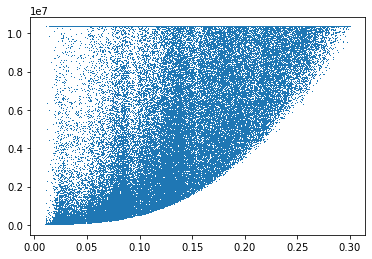

In [20]:
plt.figure()
plt.plot(data['Z'][redshift_cut], data['VMAX_EST'][redshift_cut], lw=0, marker=',')
plt.show()

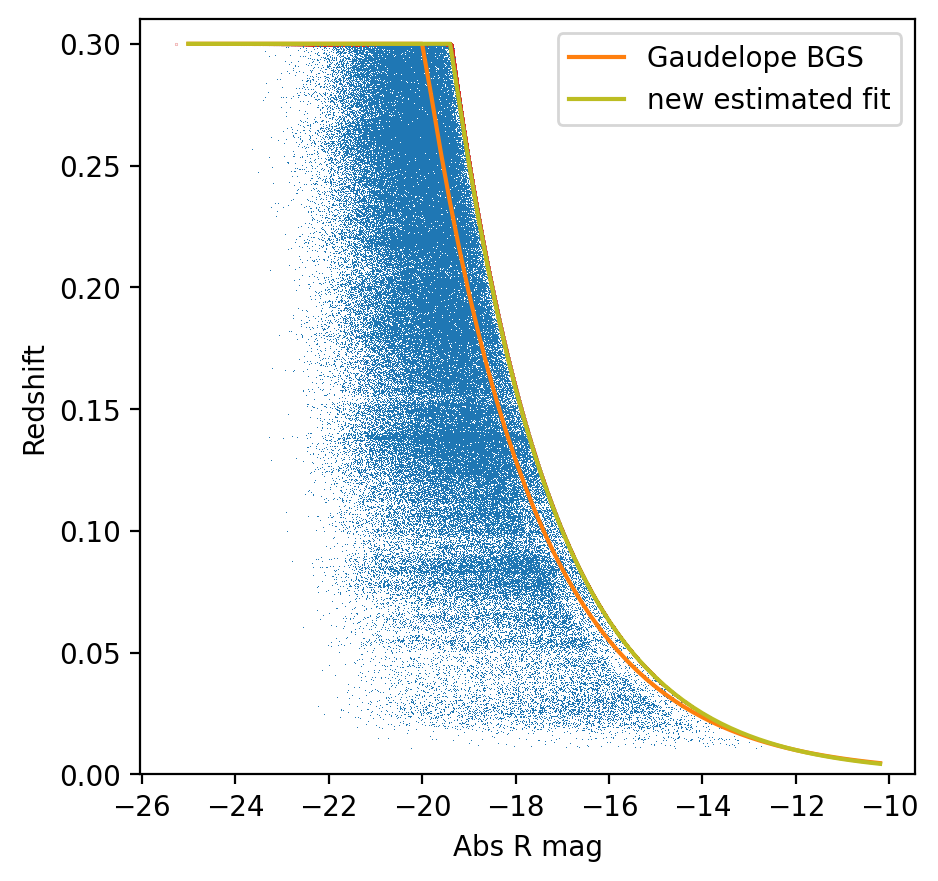

In [21]:
zmax_range = np.clip(zmax(M_range),a_min=None,a_max=0.3)
fig, ax = plt.subplots(figsize=(5,5), dpi=200)
ax.plot(data['ABSMAG_R'][redshift_cut], data['Z'][redshift_cut], lw=0, marker=',')
#ax.set_yscale('log')
ax.plot(M_range, np.clip(zmax_G(M_range),a_min=None,a_max=0.3), label='Gaudelope BGS')
ax.plot(M_range, zmax_range, label='new estimated fit', color='tab:olive')
ax.scatter(data['ABSMAG_R'], zmax_clipped, color='tab:red', s=0.01)
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
plt.savefig('figures/week3/absmag_r_v_redshift_clustering')


Attempt to do k-correction between Sloan and Legacy filters - confused about this

/tmp/ipykernel_197673/229087394.py:8: RuntimeWarning: invalid value encountered in log10
  k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)


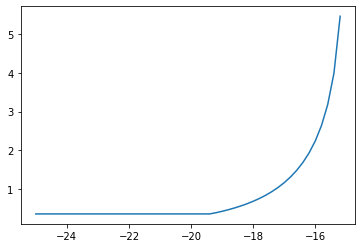

In [22]:
def find_dm(M):
    zmax_clip = np.clip(zmax(M),a_min=None,a_max=0.3)
    zmax_clip_primed = (1 + zmax_clip)/1.04 - 1
    
    dmax = cosmo.comoving_distance(zmax_clip).to_value()
    dmax_primed = cosmo.comoving_distance(zmax_clip_primed).to_value()
    
    k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)
    return k_diff
    
k_diff = find_dm(M_range)

plt.figure()
plt.plot(M_range, k_diff)
plt.show()

/tmp/ipykernel_197673/229087394.py:8: RuntimeWarning: invalid value encountered in log10
  k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)


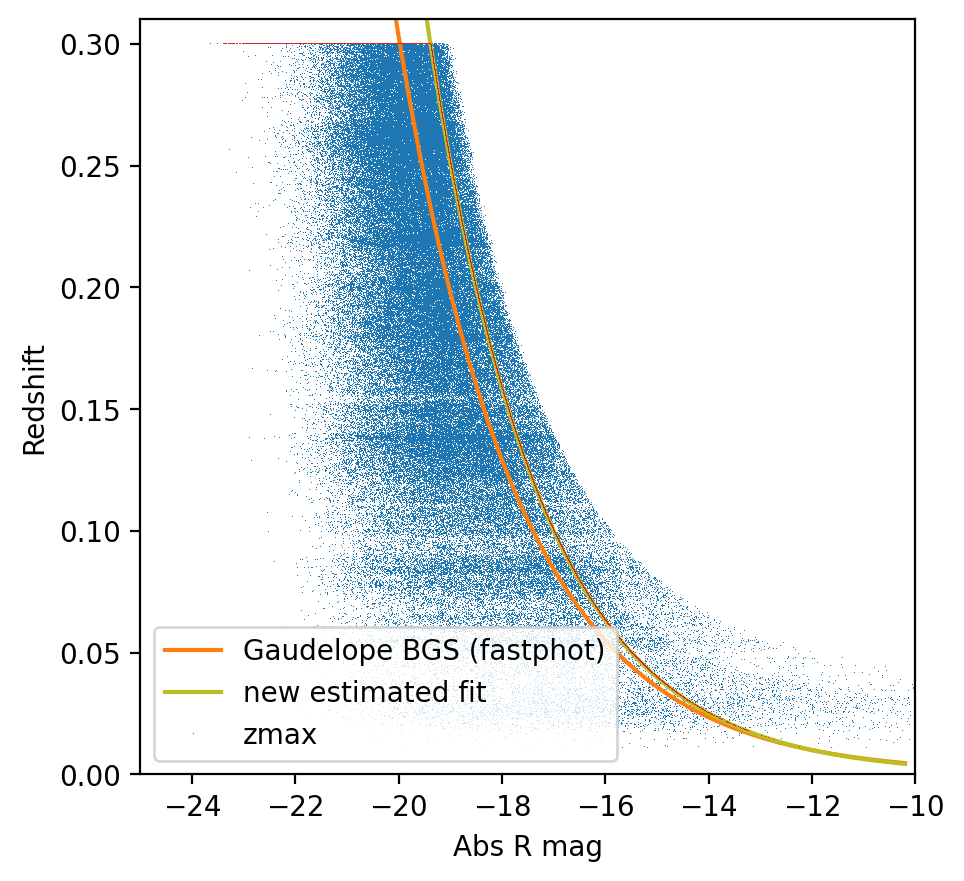

In [23]:
data['ABSMAG_SDSS_R'] = data['ABSMAG_R'] + find_dm(data['ABSMAG_R'])

fig, ax = plt.subplots(figsize=(5,5), dpi=200)

ax.plot(data['ABSMAG_SDSS_R'][redshift_cut], data['Z'][redshift_cut], lw=0, marker=',')
#ax.set_yscale('log')
ax.plot(M_range, zmax_G(M_range), label='Gaudelope BGS (fastphot)')
ax.plot(M_range, zmax(M_range), label='new estimated fit', color='tab:olive')
ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red', label='zmax')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
plt.xlim(-25,-10)
plt.savefig('figures/week3/absmag_r_v_redshift_clustering')

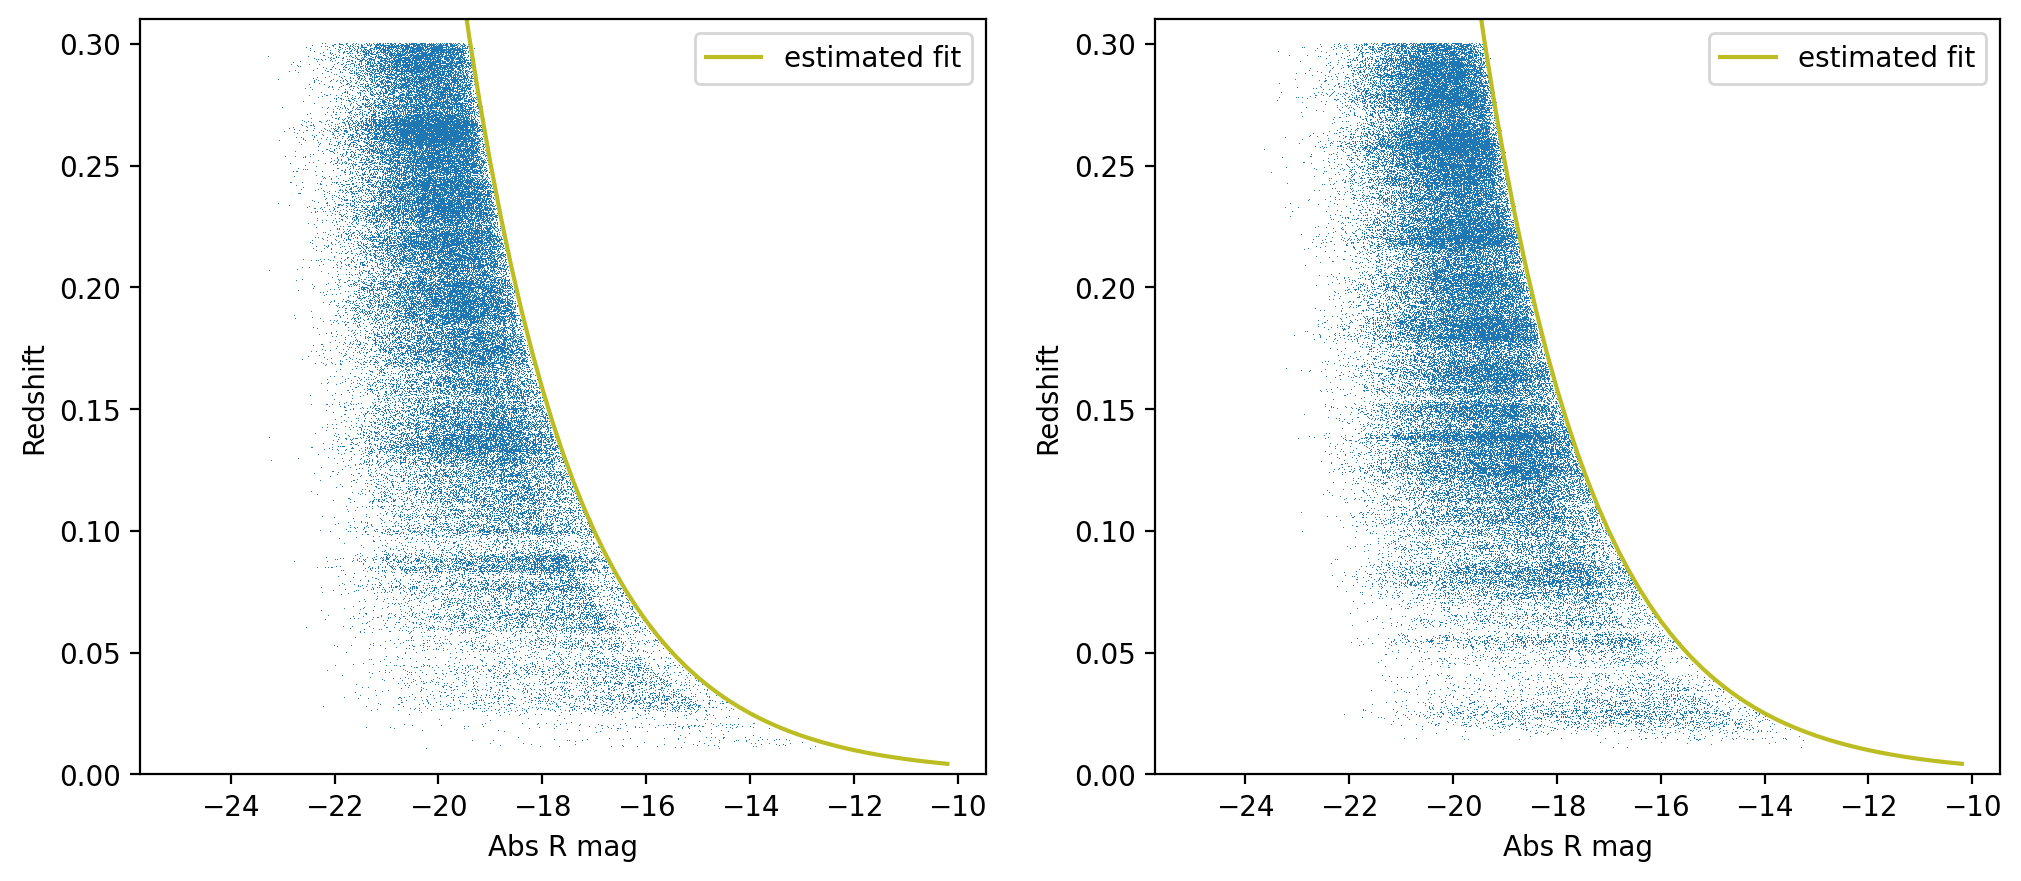

In [24]:
fig, ax = plt.subplots(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(N['ABSMAG_R'][redshift_cut_N], N['Z'][redshift_cut_N], lw=0, marker=',')
#ax.set_yscale('log')
ax1.plot(M_range, zmax(M_range), label='estimated fit', color='tab:olive')
#ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
ax2 = plt.subplot(122)
ax2.plot(S['ABSMAG_R'][redshift_cut_S], S['Z'][redshift_cut_S], lw=0, marker=',')
#ax.set_yscale('log')
ax2.plot(M_range, zmax(M_range), label='estimated fit', color='tab:olive')
#ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
plt.savefig('figures/week3/absmag_r_v_redshift_clustering_N_S')

Already cut to z < 0.6 - also filtered on redshift security?

Use volume envelope to estimate LF - not normalised properly?

In [25]:
def phi(M, phi_star=8.32*10**(-3), M_star=-20.3, alpha=-0.23): #luminosity function
    return np.log(10)*phi_star*10**(0.4*(alpha+1)*(-M+M_star))*np.exp(-10**(0.4*(-M+M_star)))/2.5

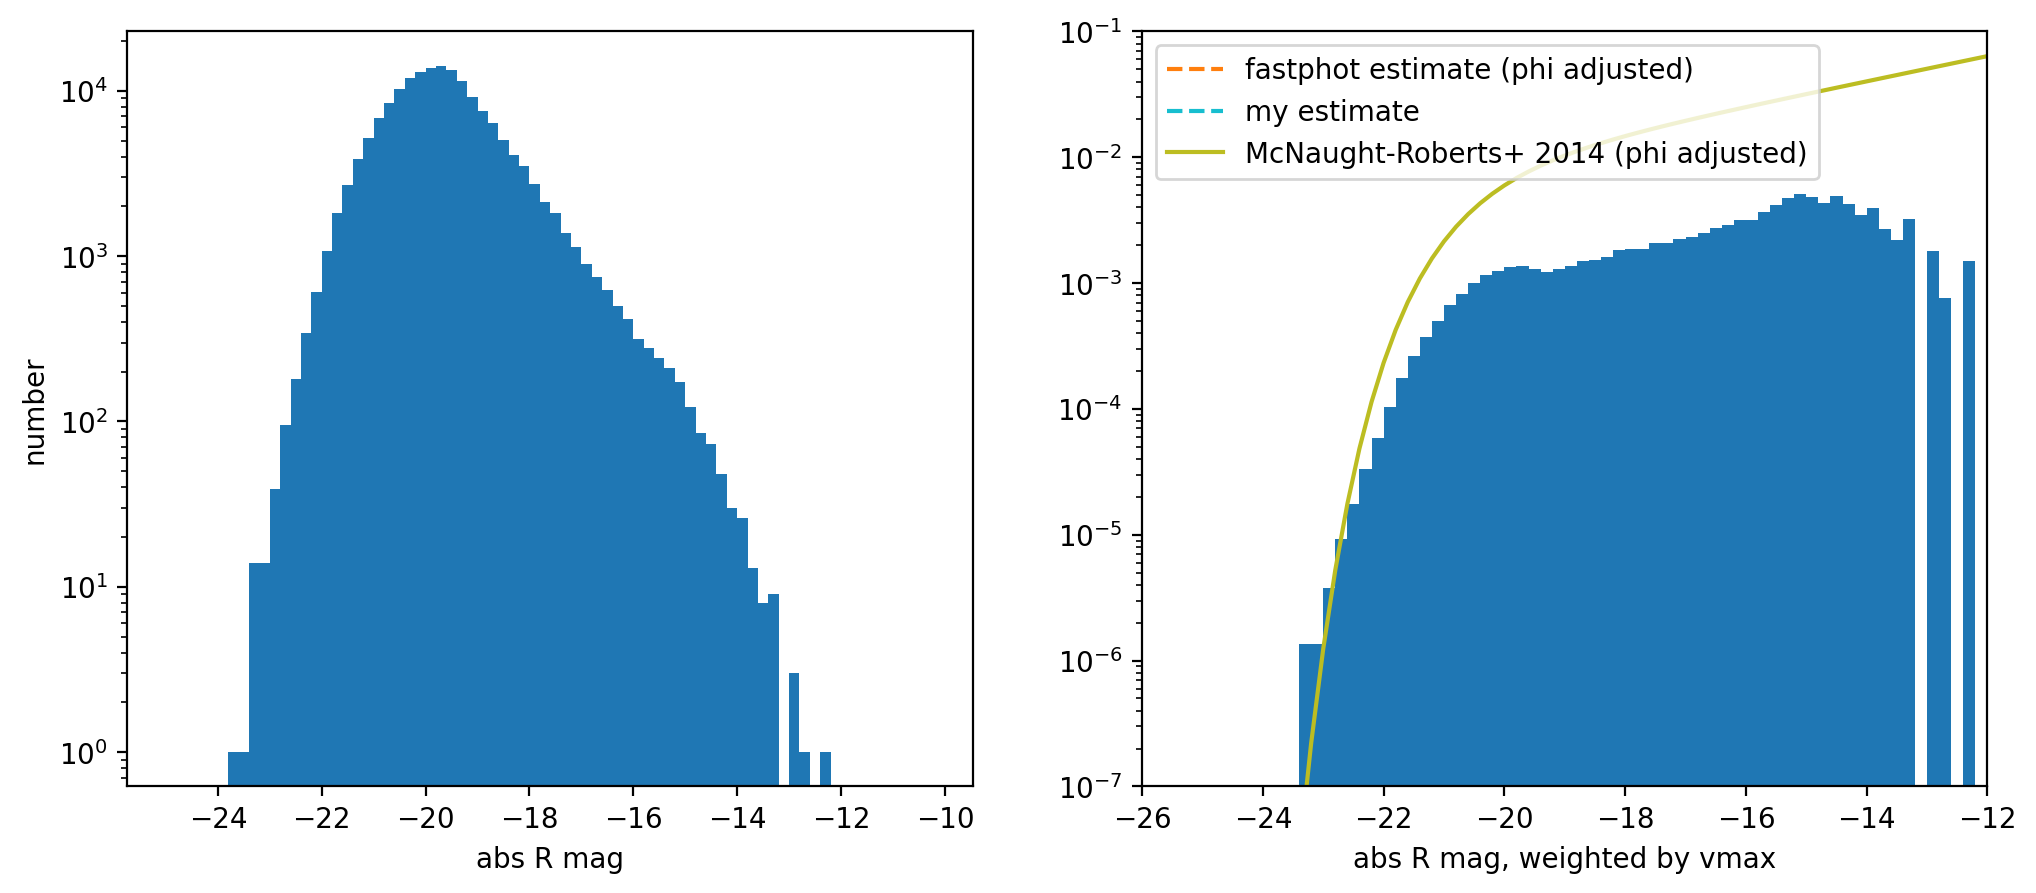

In [26]:
phi_star_est = 0.00000000003
M_star_est = -22 #-21.5#-19.7+5*np.log10(5) for b-band
alpha_est = -1.25 #-1.07

plt.figure(figsize=(12,5),dpi=200)
ax1 = plt.subplot(121)
ax1.hist(data['ABSMAG_R'][redshift_cut], bins=M_range)
ax1.set_yscale('log')
plt.xlabel('abs R mag')
plt.ylabel('number')
ax2 = plt.subplot(122)
ax2.set_yscale('log')
ax2.hist(data['ABSMAG_R'][redshift_cut], bins=M_range, weights=1/data['VMAX_EST'][redshift_cut])
#ax2.plot(M_range, phi(M_range, phi_star=0.000000000015, M_star=-20, alpha=-1.02))
ax2.plot(M_range, phi(M_range, phi_star=0.000000001, M_star=M_star_est, alpha=alpha_est), label='fastphot estimate (phi adjusted)', ls='--')
ax2.plot(M_range, phi(M_range, phi_star=0.0000000013, M_star=-21.3, alpha=alpha_est), label='my estimate', ls='--', color='tab:cyan')
ax2.plot(M_range, phi(M_range, phi_star=0.0000000015, M_star=-20.7, alpha=-1.25), label='McNaught-Roberts+ 2014 (phi adjusted)', color='tab:olive')
ax2.plot(M_range, phi(M_range, phi_star=10**(-2.03), M_star=-20.7, alpha=-1.25), color='tab:olive')
plt.xlabel('abs R mag, weighted by vmax')
plt.ylim(10**-7,10**-1)
plt.xlim(-26,-12)
plt.legend()
plt.savefig('figures/week3/clustering_abs_rmag_hist_weighted.png')

Other plots: emission line strength vs r mag, sky coverage

In [27]:
N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

N_bright['z_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_z_dered'])
N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
N_bright['g_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_g_dered'])
N_bright['r_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_r_dered'])

S_bright['z_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_z_dered'])
S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])
S_bright['g_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_g_dered'])
S_bright['r_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_r_dered'])

/tmp/ipykernel_197673/3819926912.py:2: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_197673/3819926912.py:7: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
/tmp/ipykernel_197673/3819926912.py:12: RuntimeWarning: invalid value encountered in log10
  N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
/tmp/ipykernel_197673/3819926912.py:17: RuntimeWarning: invalid value encountered in log10
  S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])


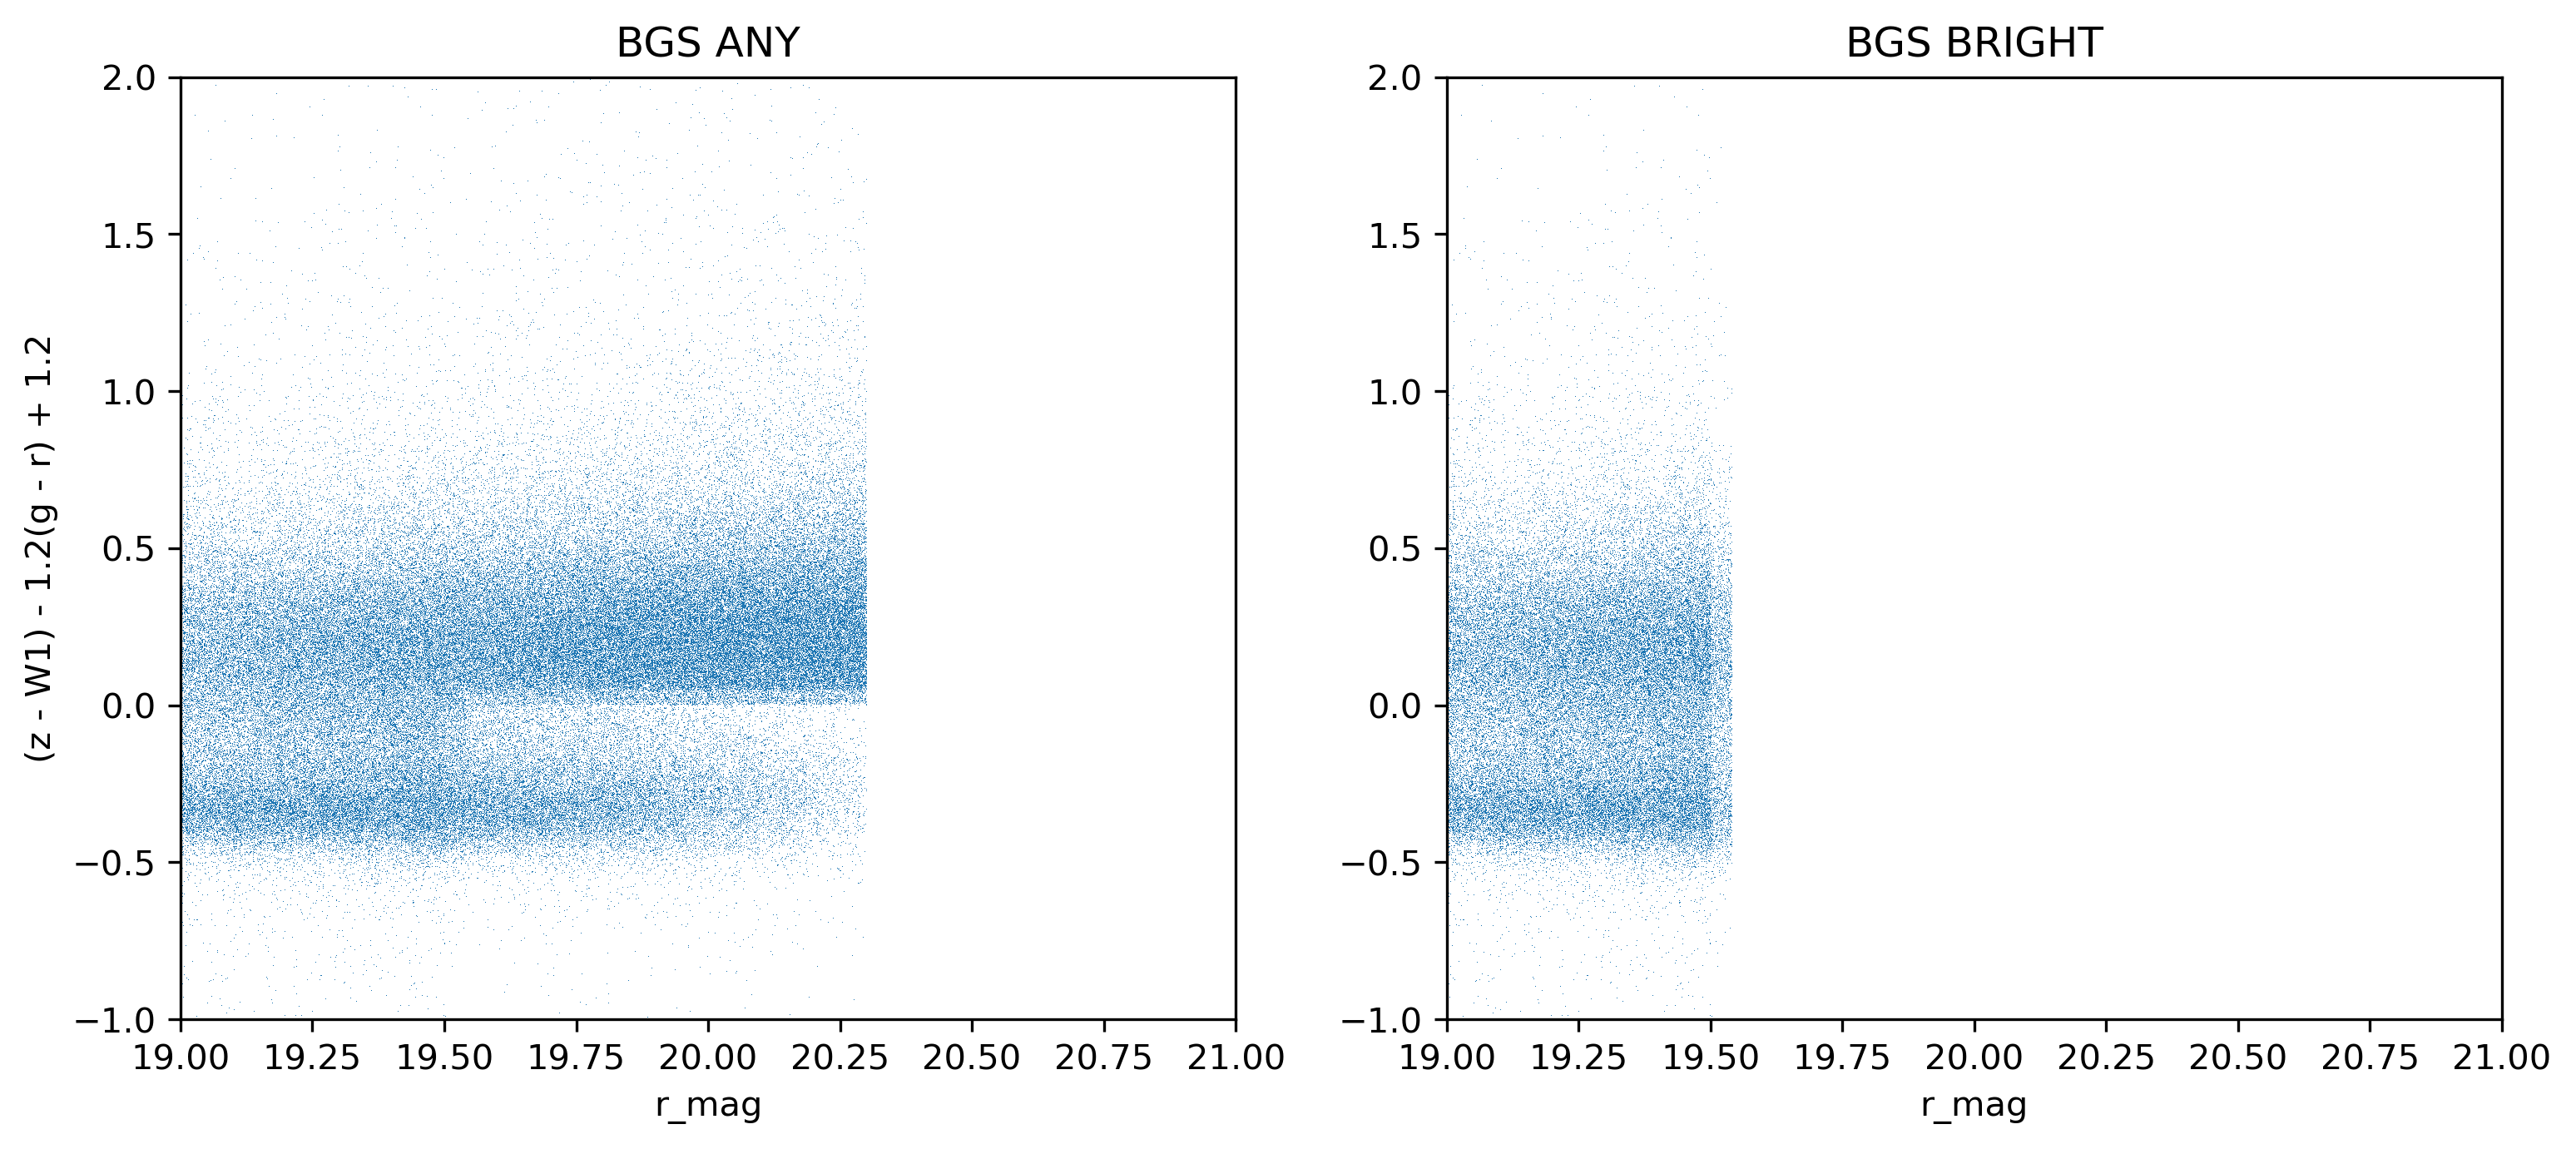

In [28]:
Y_N = (N['z_mag'] - N['w1_mag']) - 1.2*(N['g_mag'] - N['r_mag']) + 1.2
Y_S = (S['z_mag'] - S['w1_mag']) - 1.2*(S['g_mag'] - S['r_mag']) + 1.2
Y_N_bright = (N_bright['z_mag'] - N_bright['w1_mag']) - 1.2*(N_bright['g_mag'] - N_bright['r_mag']) + 1.2
Y_S_bright = (S_bright['z_mag'] - S_bright['w1_mag']) - 1.2*(S_bright['g_mag'] - S_bright['r_mag']) + 1.2



plt.figure(figsize=(12,5), dpi=300)
plt.subplot(121)
plt.title('BGS ANY')
plt.plot(N['r_mag'], Y_N, lw=0, marker=',', color='tab:blue')
plt.plot(S['r_mag'], Y_S, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((19,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.subplot(122)
plt.title('BGS BRIGHT')
plt.plot(N_bright['r_mag'], Y_N_bright, lw=0, marker=',', color='tab:blue')
plt.plot(S_bright['r_mag'], Y_S_bright, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((19,21))
plt.xlabel('r_mag')
plt.savefig('figures/week3/clustering_Fig4.png')

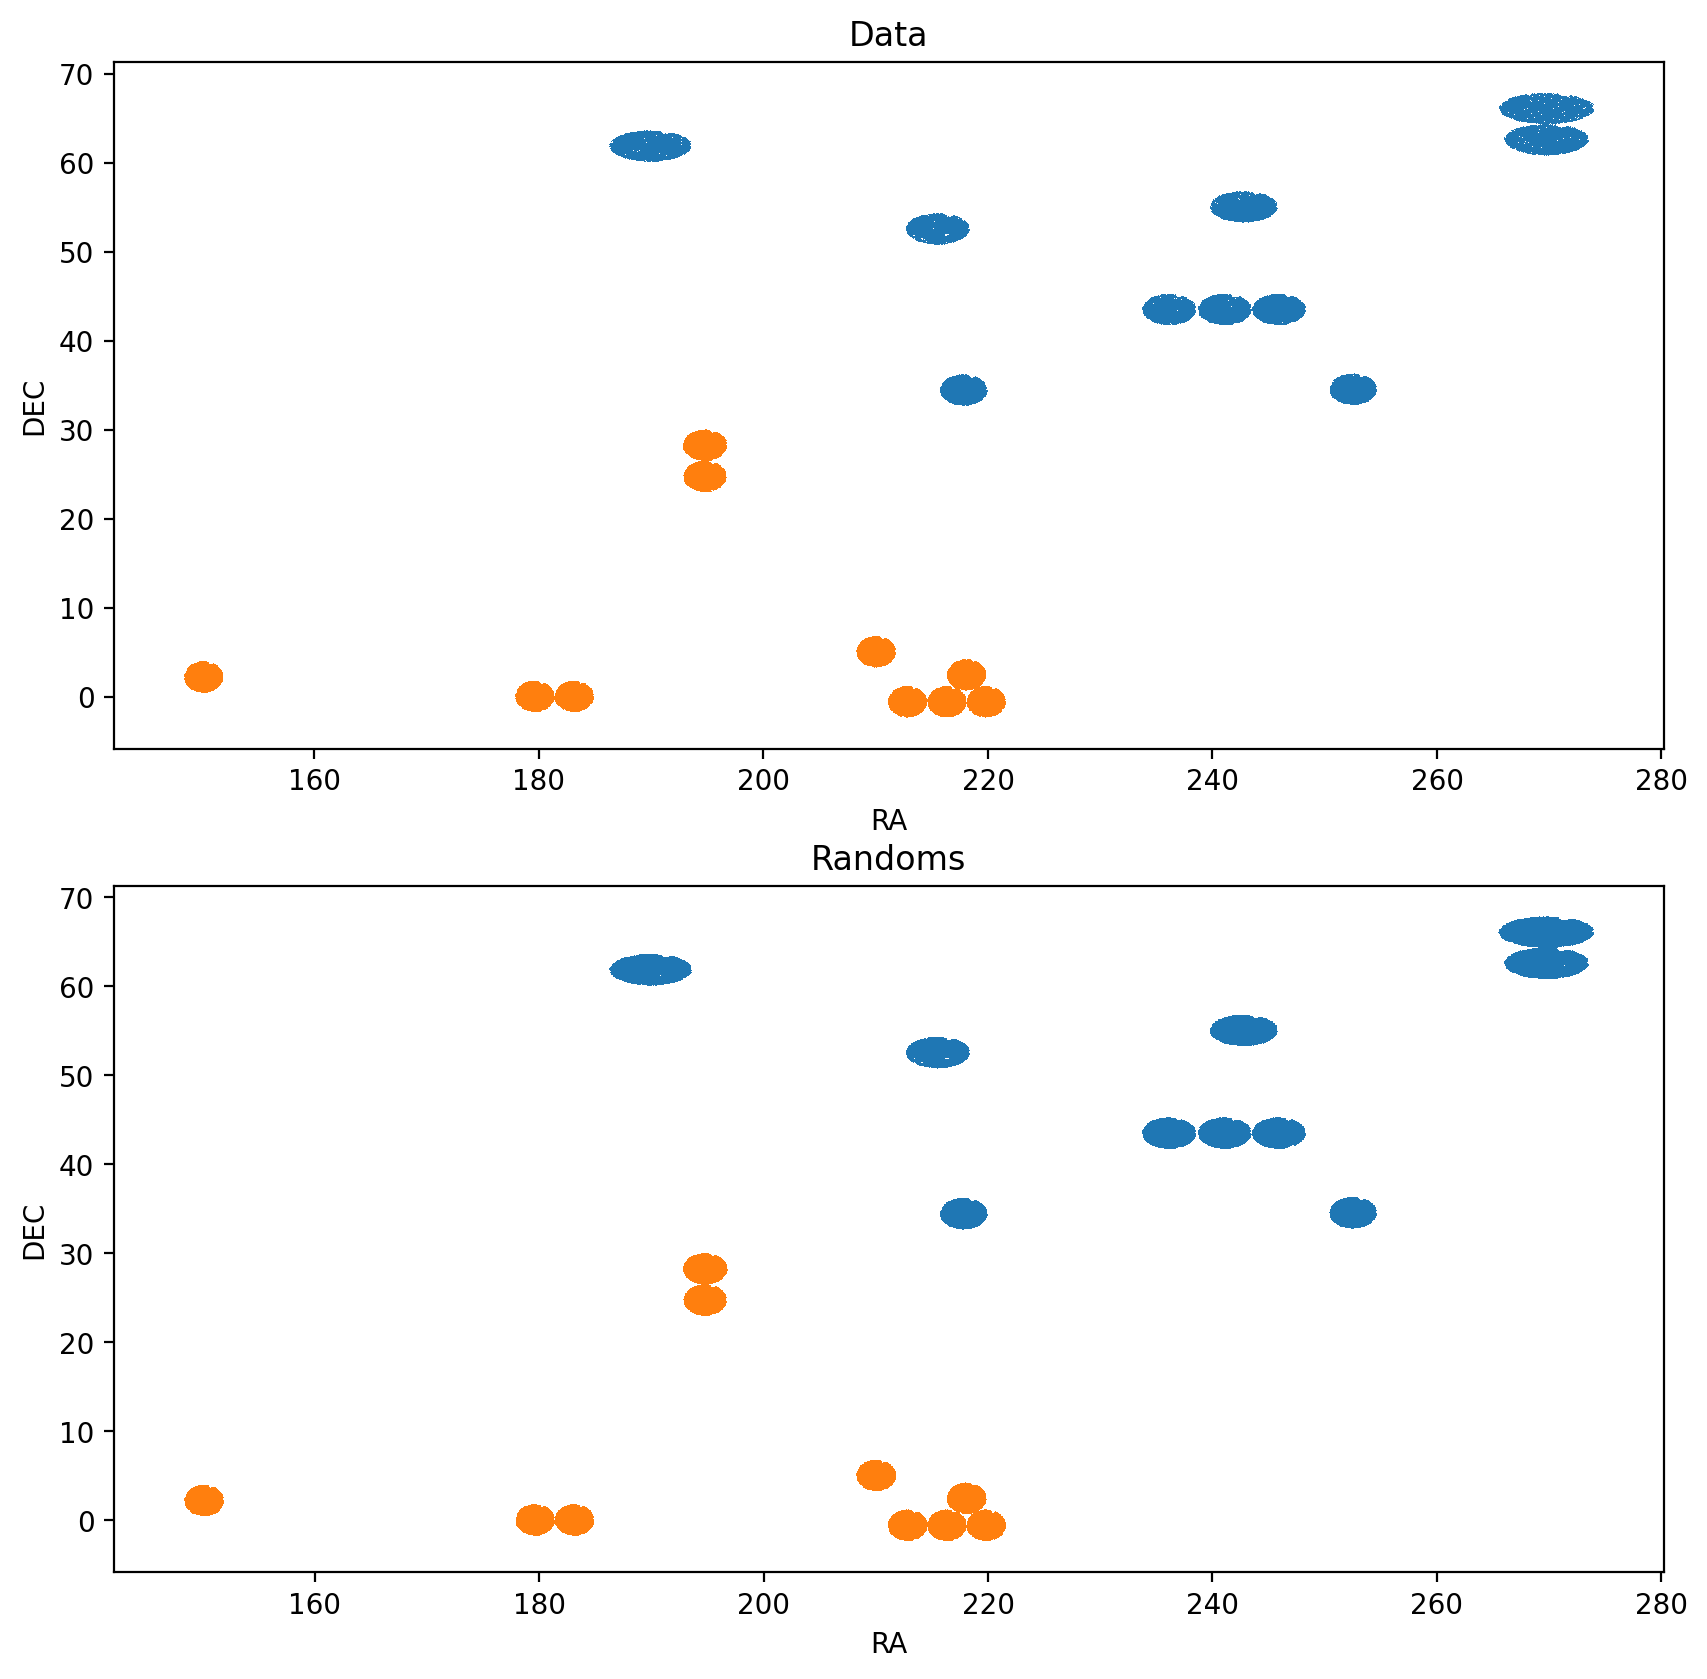

In [29]:
plt.figure(figsize=(10,10), dpi=200)
plt.subplot(211)
plt.title('Data')
plt.plot(N['RA'], N['DEC'], lw=0, marker=',', label='N')
plt.plot(S['RA'], S['DEC'], lw=0, marker=',', label='S')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.subplot(212)
plt.title('Randoms')
plt.plot(N0['RA'], N0['DEC'], lw=0, marker=',')
plt.plot(S0['RA'], S0['DEC'], lw=0, marker=',')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('figures/week3/clustering_sky_coverage')

Attempt to calculate number density (too low due to large volume?) and FKP weights

In [30]:
def fkp_model(n,p):
    return 1/(1 + n*p)

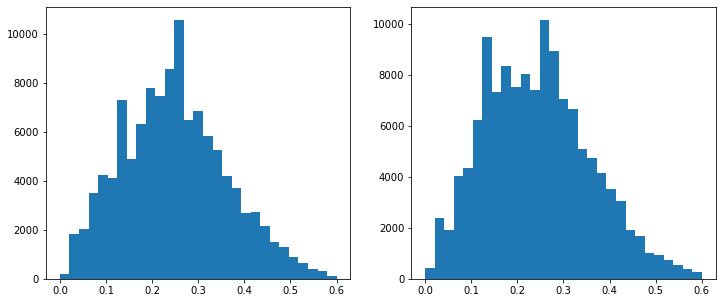

In [31]:
z_bins = np.linspace(0,0.6,30)#np.arange(0,0.61,0.05)
plt.figure(figsize=(12,5))
plt.subplot(121)
count_N = plt.hist(N['Z'], bins=z_bins)
plt.subplot(122)
count_S = plt.hist(S['Z'], bins=z_bins)
plt.show()

In [32]:
number_N = count_N[0] #taget counts in redshift bins size 0.1 from 0.1 <= z <= 0.6
print(np.shape(number_N))
number_N[np.where(number_N==0.0)] = np.nan

number_S = count_S[0] #taget counts in redshift bins size 0.1 from 0.1 <= z <= 0.6
number_S[np.where(number_S==0.0)] = np.nan


(29,)


In [33]:
"""vol_between = []
for i, z in enumerate(z_bins):
    if i==0:
        continue
    vol_between.append( fsky*(cosmo.comoving_volume(z_bins[i]) - cosmo.comoving_volume(z_bins[i-1])).to_value() )

vol_between = np.array(vol_between)
print(vol_between[0:20], np.shape(vol_between), np.shape(number_N))
number_density_N = number_N/vol_between 
number_density_S = number_S/vol_between """
z_bins = np.linspace(0,0.6,50)#np.arange(0,0.61,0.05)

#code to do this already?

def find_number_density(data, z_b):
    count = plt.hist(data['Z'], bins=z_b)
    number= count[0] #taget counts in redshift bins size 0.1 from 0.1 <= z <= 0.6
    number[np.where(number==0.0)] = np.nan
    
    vol_between = []
    for i, z in enumerate(z_b):
        if i==0:
            continue
        vol_between.append( fsky*(cosmo.comoving_volume(z_b[i]) - cosmo.comoving_volume(z_b[i-1])).to_value() )

    vol_between = np.array(vol_between)
    number_density = number/vol_between 
    return number_density

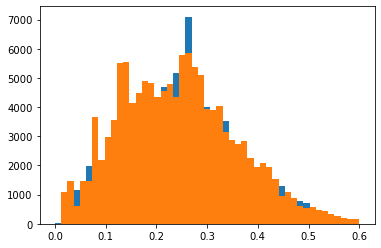

In [34]:
n_N = find_number_density(N, z_bins)
n_S = find_number_density(S, z_bins)

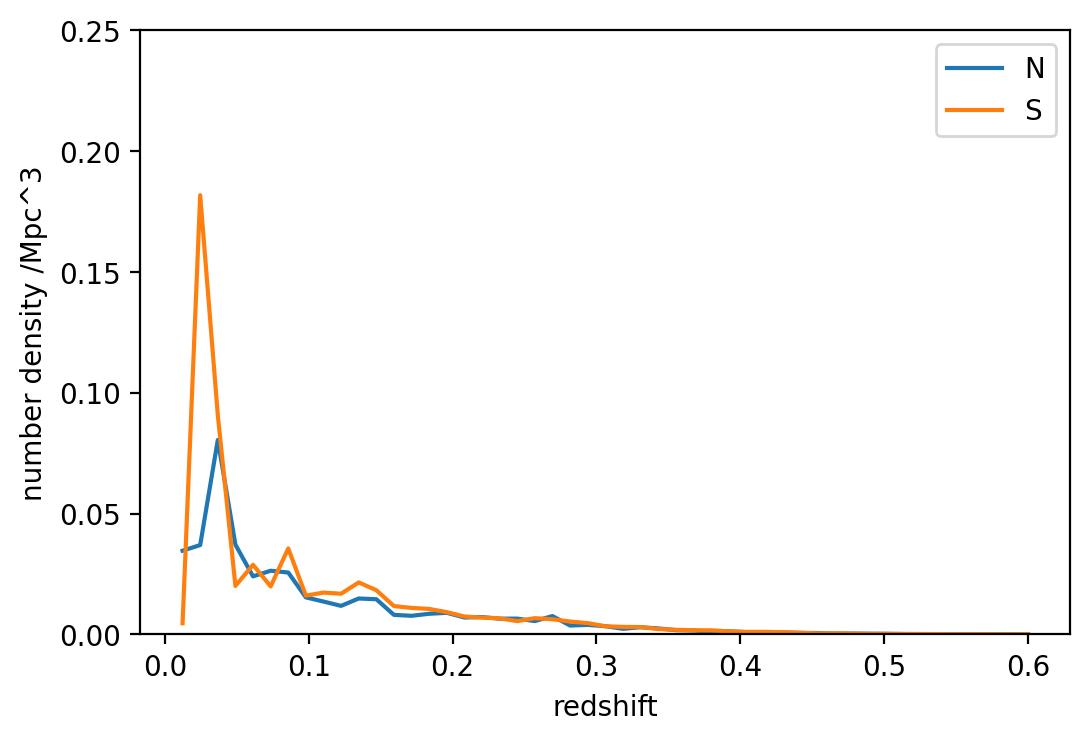

In [35]:
plt.figure(dpi=200)
plt.plot(z_bins[1:], n_N, label='N')
plt.plot(z_bins[1:], n_S, label='S')
plt.xlabel('redshift')
plt.ylabel('number density /Mpc^3')
plt.ylim(0,0.25)
plt.legend()
plt.savefig('figures/week3/number_density.png')
#magnitude cuts?

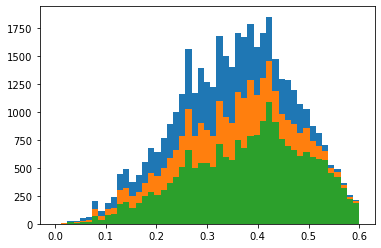

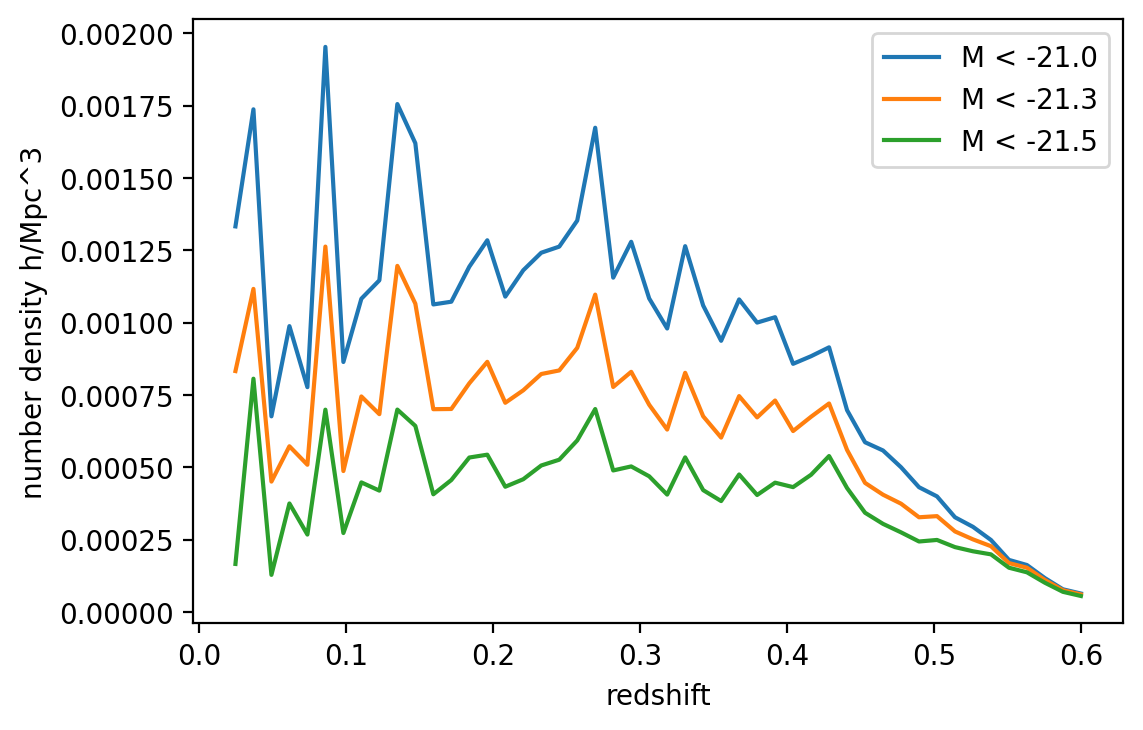

In [36]:
maglim_211 = np.where(data['ABSMAG_R'] < -21.1)[0]
n_211 = find_number_density(data[maglim_211], z_bins)
maglim_213 = np.where(data['ABSMAG_R'] < -21.3)[0]
n_213 = find_number_density(data[maglim_213], z_bins)
maglim_215 = np.where(data['ABSMAG_R'] < -21.5)[0]
n_215 = find_number_density(data[maglim_215], z_bins)

plt.figure(dpi=200)
plt.plot(z_bins[1:], n_211, label='M < -21.0')
plt.plot(z_bins[1:], n_213, label='M < -21.3')
plt.plot(z_bins[1:], n_215, label='M < -21.5')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('number density h/Mpc^3')
plt.savefig('figures/week3/number_density_maglim.png')

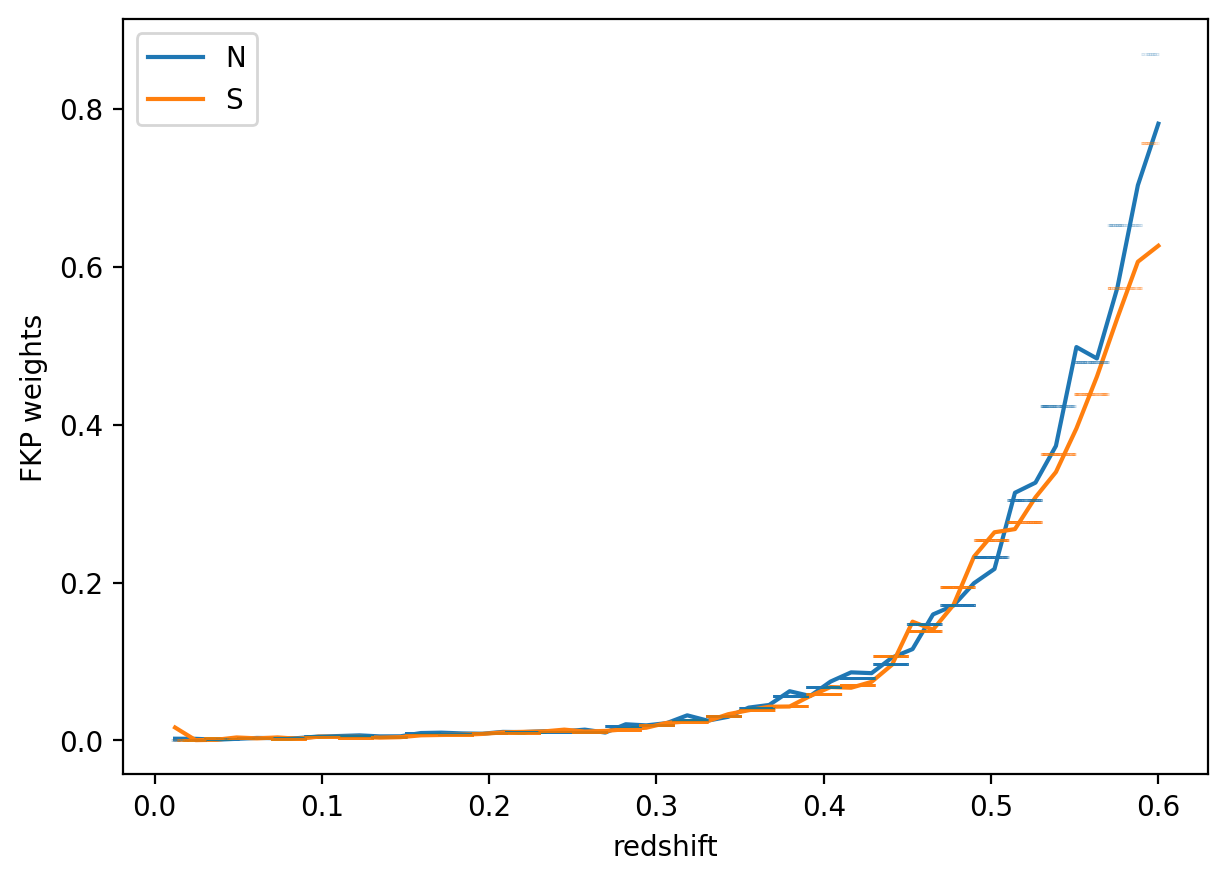

In [37]:
fkp_model_weights_N = fkp_model(n_N, 13000) #suggested:80000 6500000000 80000**2 H0=100:60000
fkp_model_weights_S = fkp_model(n_S, 13000) #depends on no of bins - currently 30 (counted apparent no. data bins)

fig, ax = plt.subplots(figsize=(7,5),dpi=200)
plt.plot(z_bins[1:],fkp_model_weights_N, label='N', color='tab:blue')
plt.plot(z_bins[1:],fkp_model_weights_S, label='S', color='tab:orange')
plt.plot(N['Z'], N['WEIGHT_FKP'], lw=0, marker='o', markersize=0.01, color='tab:blue')
plt.plot(S['Z'], S['WEIGHT_FKP'], lw=0, marker='o', markersize=0.01, color='tab:orange')
plt.xlabel('redshift')
plt.ylabel('FKP weights')
#ax.set_yscale('log')
plt.legend()
plt.savefig('figures/week3/fkpweight_v_redshift.png')
#N and S different

In [38]:
data['WEIGHT_FKP']

0.0189012692383565
0.0189012692383565
0.008223843310435642
0.0189012692383565
0.055734255355941044
0.010340274472459292
0.011002985286624948
0.008223843310435642
0.002739038688499766
0.025652801612254514
0.07910539759810101
